In [2]:
from google.colab import files
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
uploaded = files.upload()

Saving sample_01.jpg to sample_01 (1).jpg


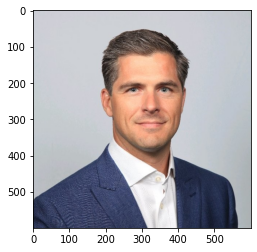

In [4]:
img = cv2.imread('sample_01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [5]:
# Alternatively, we can also use the image library from matplotlib and used it as below. 
# In this, we don’t need to convert the image into RGB format.



# import matplotlib.image as mpimg
# img = mpimg.imread('sample_01.jpg'smoo)
# plt.imshow(img)

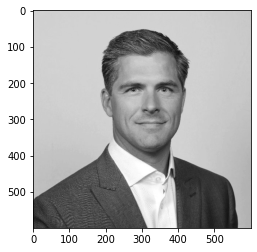

In [7]:
# Converting orignal image to grayscale
greys_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(greys_image, cmap='gray')

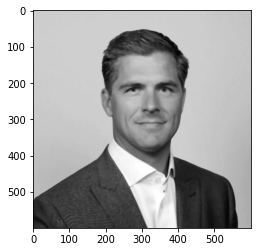

In [8]:
# smoothing the grays_image 
smooth_grays = cv2.medianBlur(greys_image, ksize=5)
plt.imshow(smooth_grays, cmap='gray')

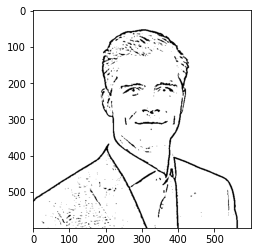

In [9]:
# highlighting edges to cartoonize the image
get_edge = cv2.adaptiveThreshold(smooth_grays, maxValue=255, adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C, thresholdType=cv2.THRESH_BINARY, 
                                 blockSize=9, C=9)
plt.imshow(get_edge, cmap='gray')

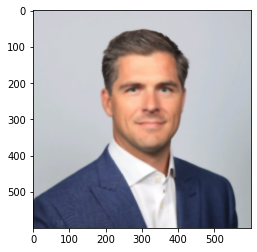

In [12]:
# Applying bilateral filter to remove noise and keep edge sharp
color_image = cv2.bilateralFilter(img, d=9, sigmaColor=300, sigmaSpace=300)
plt.imshow(color_image, cmap='gray')

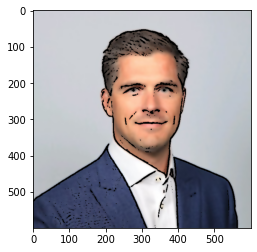

In [14]:
# use the egde_image as mask to color_image
cartoon_image = cv2.bitwise_and(src1=color_image, src2=color_image, mask=get_edge)
plt.imshow(cartoon_image, cmap='gray')